In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

# Исследование и обработка данных

In [3]:
training_set = pd.read_csv('train.csv')

In [4]:
test_set = pd.read_csv('sample_submission.csv')

In [5]:
test_set.head()

,id,target
0,0;133,0
1,0;5,1
2,0;10,0
3,0;396,1
4,0;14,0


## Формирование столбцов user_id и cart из столбца id

In [6]:
test_set['user_id'] = test_set['id'].apply(lambda x: int(x.split(';')[0]))

In [7]:
test_set['cart'] = test_set['id'].apply(lambda x: int(x.split(';')[1]))

In [8]:
test_set.drop('id', axis=1, inplace=True)

In [9]:
test_set

,target,user_id,cart
0,0,0,133
1,1,0,5
2,0,0,10
3,1,0,396
4,0,0,14
...,...,...,...
790444,0,19998,26
790445,0,19998,31
790446,1,19998,29
790447,1,19998,798


In [10]:
training_set.info

<bound method DataFrame.info of          user_id   order_completed_at  cart
0              2  2015-03-22 09:25:46   399
1              2  2015-03-22 09:25:46    14
2              2  2015-03-22 09:25:46   198
3              2  2015-03-22 09:25:46    88
4              2  2015-03-22 09:25:46   157
...          ...                  ...   ...
3123059    12702  2020-09-03 23:45:45   441
3123060    12702  2020-09-03 23:45:45    92
3123061    12702  2020-09-03 23:45:45   431
3123062    12702  2020-09-03 23:45:45    24
3123063    12702  2020-09-03 23:45:45   430

[3123064 rows x 3 columns]>

In [11]:
training_set.head()

,user_id,order_completed_at,cart
0,2,2015-03-22 09:25:46,399
1,2,2015-03-22 09:25:46,14
2,2,2015-03-22 09:25:46,198
3,2,2015-03-22 09:25:46,88
4,2,2015-03-22 09:25:46,157


In [12]:
training_set.drop('order_completed_at', axis=1, inplace=True)

In [13]:
# Создание столбца target, отражающего наличие дубликатов в тренировочных данных
training_set['target'] = training_set.duplicated(keep=False).apply(lambda x: 1 if x == True else 0)

In [14]:
training_set.head()

,user_id,cart,target
0,2,399,0
1,2,14,0
2,2,198,1
3,2,88,1
4,2,157,1


<AxesSubplot:xlabel='target', ylabel='count'>

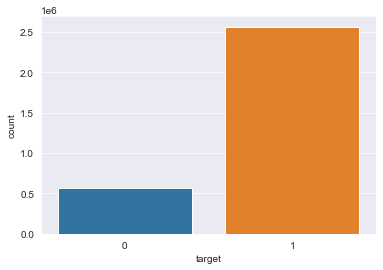

In [15]:
sns.set_style('darkgrid')
sns.countplot(x='target', data=training_set)

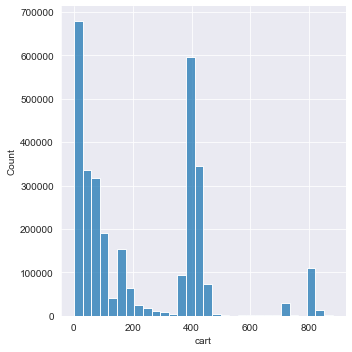

In [16]:
sns.displot(training_set['cart'].dropna(), bins=30)

In [17]:
training_set.loc[(training_set['user_id'] == 2) & (training_set['cart'] == 198)]

,user_id,cart,target
2,2,198,1
10692,2,198,1


# Создание и тренировка модели

In [18]:
# Разделяем данные
X_train = training_set.drop('target', axis=1)
y_train = training_set['target']

X_test = test_set[['user_id', 'cart']]
y_test = test_set['target']

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lrm = LogisticRegression()

In [21]:
lrm.fit(X_train, y_train)

LogisticRegression()

In [22]:
predictions = lrm.predict(X_test)

# Оценка модели

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.49      0.01      0.01    394594
           1       0.50      0.99      0.67    395855

    accuracy                           0.50    790449
   macro avg       0.50      0.50      0.34    790449
weighted avg       0.50      0.50      0.34    790449



In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(y_test, predictions)

array([[  2717, 391877],
       [  2781, 393074]])

# Формирование сабмита

In [27]:
X_test['target'] = predictions

In [28]:
X_test.sort_values(['user_id', 'cart'], ascending=True, inplace=True)

In [29]:
# Добавление первоначального столбца id
X_test['id'] = X_test.user_id.apply(str) + ';' + X_test.cart.apply(str)

In [30]:
X_test

,user_id,cart,target,id
1,0,5,1,0;5
2,0,10,1,0;10
4,0,14,1,0;14
9,0,20,1,0;20
11,0,22,1,0;22
...,...,...,...,...
790439,19998,398,1,19998;398
790438,19998,409,1,19998;409
790448,19998,415,1,19998;415
790436,19998,420,1,19998;420


In [31]:
submission = pd.DataFrame({'id': X_test['id'], 'target': X_test['target']})
submission.to_csv('submission.csv', index=False)